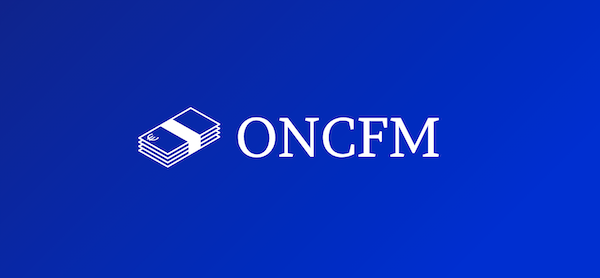

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pca
from pca import pca
from scipy.stats import norm
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [49]:
# import du fichier
df = pd.read_csv("billets.csv",sep=';')
df_prod = pd.read_csv("billets_production.csv",sep=',')

In [50]:
df_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
df.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [8]:
df[df.duplicated()==True]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [9]:
#sns.pairplot(df, kind="scatter", hue='is_genuine',palette = "Paired")

# Traitement des valeurs manquantes

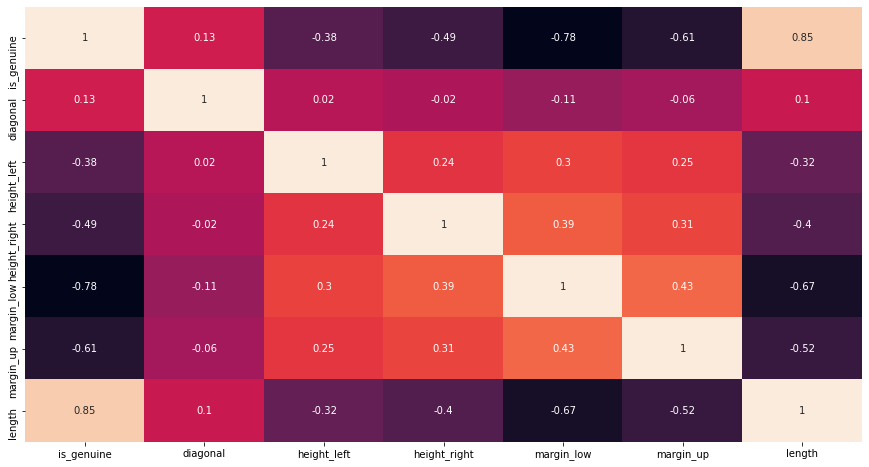

In [10]:
plt.figure(figsize=(15, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cbar=None);

In [11]:
# 37 valeurs nan
df_na = df[df['margin_low'].isnull()]

In [12]:
# dropna()
df_val=df.dropna()

In [13]:
reg_multiple=smf.ols('margin_low ~ is_genuine + height_left + height_right + margin_up + length',data=df_val).fit()
print(reg_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.23e-300
Time:                        16:59:00   Log-Likelihood:                -774.20
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7806      6

In [14]:
# Uniquement margin_up

reg_multiple_2=smf.ols('margin_low ~ is_genuine + margin_up ',data=df_val).fit()
print(reg_multiple_2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.24e-304
Time:                        16:59:00   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

In [15]:
linear_predict = df_na.drop(columns=['diagonal','height_left','height_right','margin_low','length'])

In [17]:
# Création d'une liste contenant les valeurs calculées de la variable margin_up
margin_low_predict = reg_multiple_2.predict(linear_predict)

In [18]:
# Remplacement des valeurs nulles par les valeurs prédites
df.loc[df["margin_low"].isnull(), 'margin_low'] = margin_low_predict

In [19]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Distribution

In [20]:
df['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


diagonal


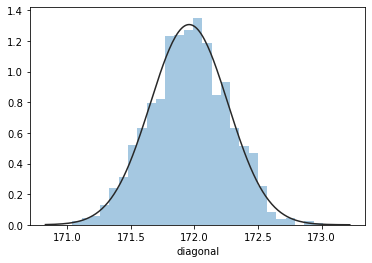

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


height_left


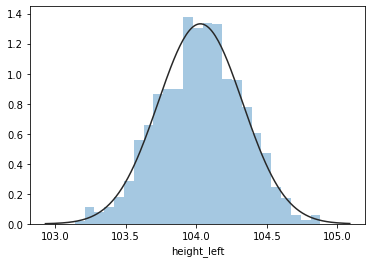

height_right


C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


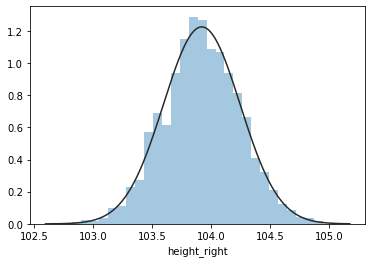

margin_low


C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


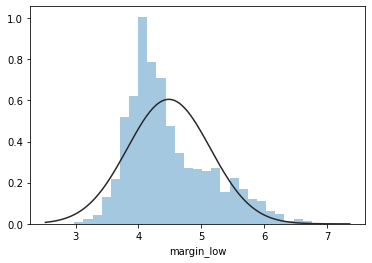

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


margin_up


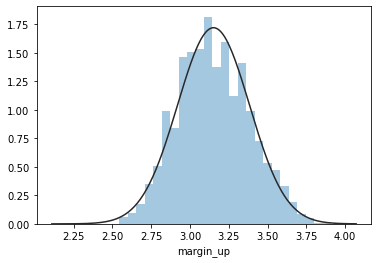

length


C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


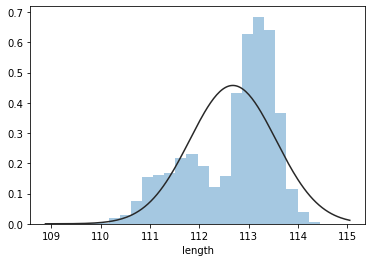

In [21]:
# verification de la distribution gausienne, test de normalité
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col], fit=norm, kde=False)
    print(col)
    plt.show()

In [22]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('float'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

diagonal-------------------------------------------------------------- 0.9986858367919922 0.323654443025589
On ne peux pas rejetter H0: la distribution suit une loi normale
height_left----------------------------------------------------------- 0.9979056715965271 0.051517147570848465
On ne peux pas rejetter H0: la distribution suit une loi normale
height_right---------------------------------------------------------- 0.9995181560516357 0.9806451797485352
On ne peux pas rejetter H0: la distribution suit une loi normale
margin_low------------------------------------------------------------ 0.9356750249862671 6.007587480042917e-25
On rejette H0 : la distribution ne suit pas une loi normale
margin_up------------------------------------------------------------- 0.996167778968811 0.000814208120573312
On rejette H0 : la distribution ne suit pas une loi normale
length---------------------------------------------------------------- 0.9176015853881836 7.865591300479774e-28
On rejette H0 : la dist

diagonal


<Figure size 432x288 with 0 Axes>

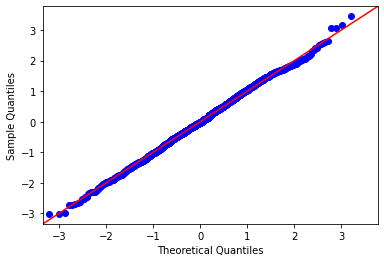

height_left


<Figure size 432x288 with 0 Axes>

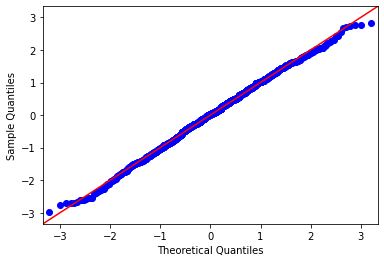

height_right


<Figure size 432x288 with 0 Axes>

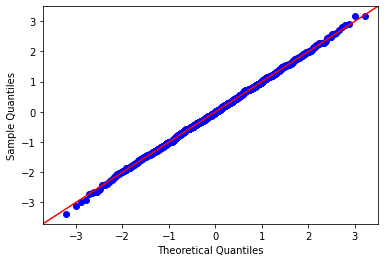

margin_low


<Figure size 432x288 with 0 Axes>

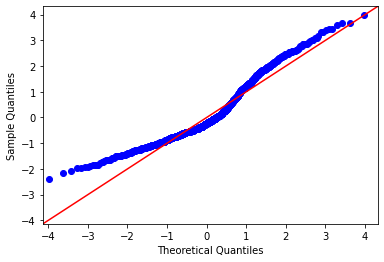

margin_up


<Figure size 432x288 with 0 Axes>

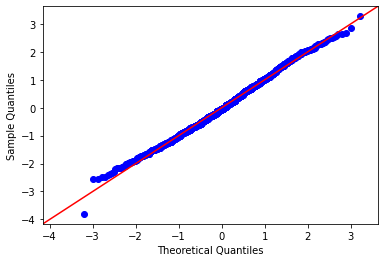

length


<Figure size 432x288 with 0 Axes>

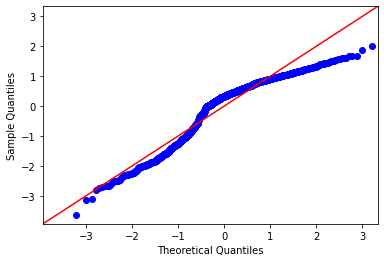

In [23]:
# qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('float'):
    plt.figure()
    sm.qqplot(df[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

# Logistic regression

In [24]:
#cat.codes
df['is_genuine'] = df['is_genuine'].astype('category').cat.codes

In [26]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [43]:
X = df.drop(['is_genuine'],axis=1)
y = df['is_genuine']

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X,y)

LogisticRegression()

In [46]:
model.score(X,y)

0.9906666666666667

In [ ]:
def faux_billets(model, diagonal=)